Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.2771 - loss: 1.9991 - val_accuracy: 0.3881 - val_loss: 1.7132
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3920 - loss: 1.6820 - val_accuracy: 0.3991 - val_loss: 1.6898
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4304 - loss: 1.5914 - val_accuracy: 0.4426 - val_loss: 1.5549
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4496 - loss: 1.5388 - val_accuracy: 0.4442 - val_loss: 1.5568
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4648 - loss: 1.4935 - val_accuracy: 0.4749 - val_loss: 1.4755
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4854 - loss: 1.4423 - val_accuracy: 0.4851 - val_loss: 1.4639
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4903 - loss: 1.4197 - val_accuracy: 0.4829 - val_loss: 1.4463
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5013 - loss: 1.3928 - 

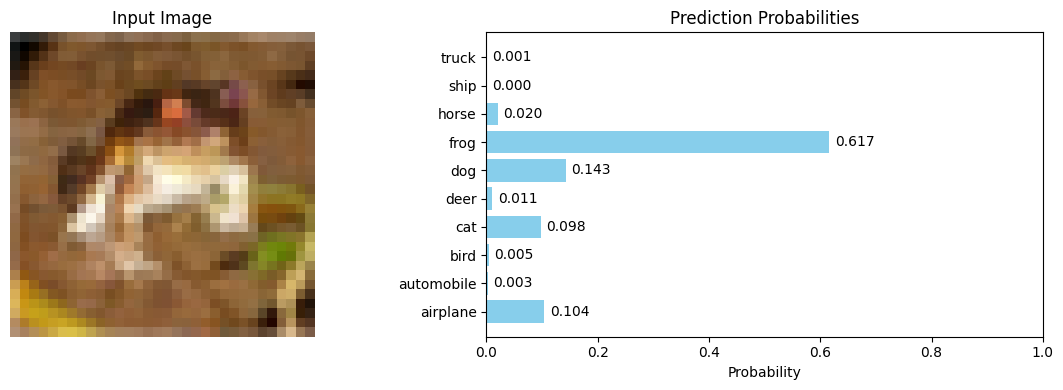


Prediction for image 2:
Predicted: truck (confidence: 0.806)


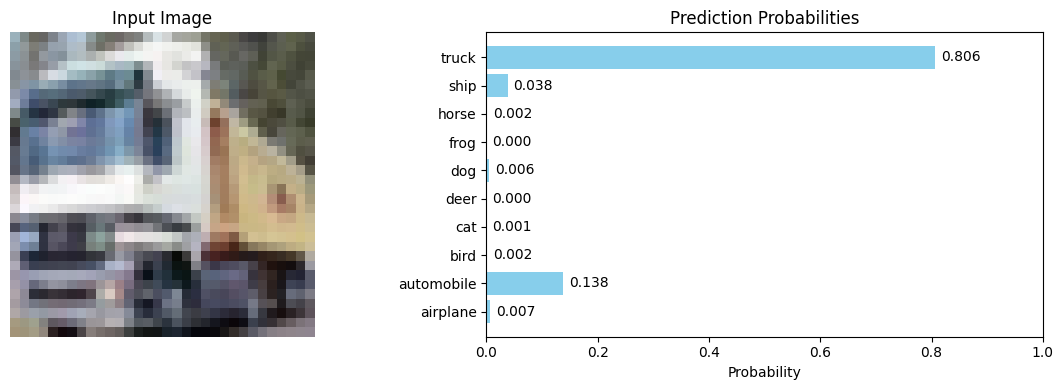


Prediction for image 3:
Predicted: truck (confidence: 0.982)


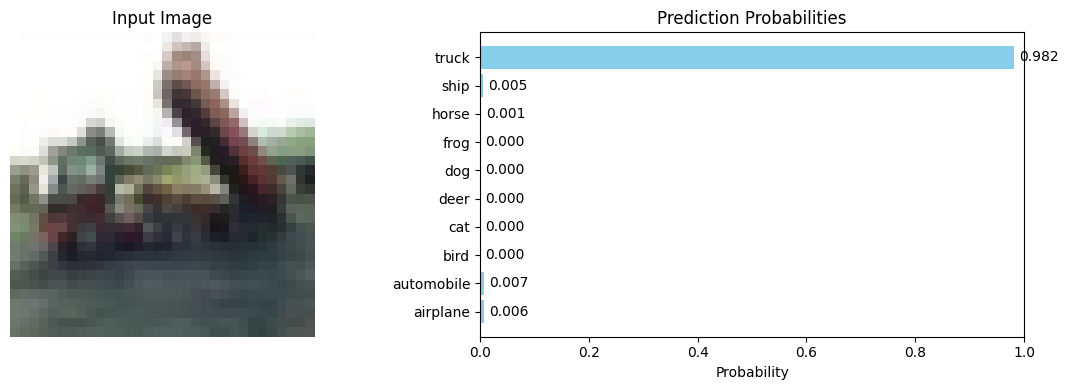

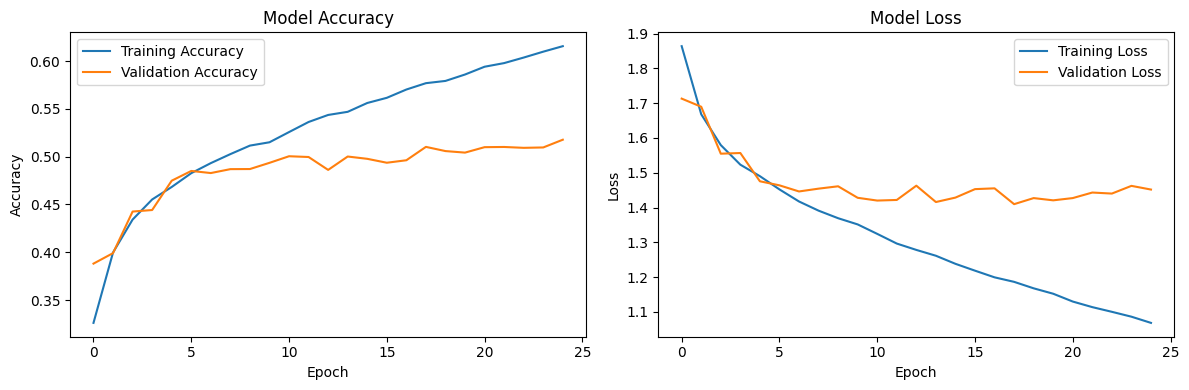

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def create_model(hidden_units=None, activation=None):
    """
    Create a neural network model with specified hidden units and activation function
    """
    if hidden_units is None:
        hidden_units = [512, 256, 128]
    if activation is None:
        activation = 'relu'

    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(hidden_units[0], activation=activation),
        layers.Dense(hidden_units[1], activation=activation),
        layers.Dense(hidden_units[2], activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    return model


hidden_units = [512, 256, 128]
activation = 'relu'
results_dict = {}
counter = 1


model = create_model(hidden_units=hidden_units, activation=activation)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=25,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

_, test_acc = model.evaluate(x_test, y_test, verbose=0)


model_info = {
    "Hidden units": hidden_units,
    "Activation": activation,
    "Test accuracy": round(test_acc * 100, 4)
}
results_dict[counter] = model_info


for key, value in results_dict.items():
    print(f"Run {key}:")
    for info_key, info_value in value.items():
        print(f"  {info_key}: {info_value}")
    print("-" * 40)

print("\n")
max_accuracy_run = max(results_dict, key=lambda k: results_dict[k]["Test accuracy"])
max_accuracy_info = results_dict[max_accuracy_run]
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key, info_value in max_accuracy_info.items():
    print(f"  {info_key}: {info_value}")


num_images = 3
sample_images = x_train[:num_images]
predictions = model.predict(sample_images, verbose=0)

def plot_probability_meter(predictions, image, class_labels=None):
    """
    Plot the image and its prediction probabilities
    """
    if class_labels is None:
        class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                       "dog", "frog", "horse", "ship", "truck"]

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))


    axs[0].imshow(image)
    axs[0].set_title('Input Image')
    axs[0].axis('off')


    bars = axs[1].barh(class_labels, predictions, color='skyblue')
    axs[1].set_xlim([0, 1])
    axs[1].set_xlabel('Probability')
    axs[1].set_title('Prediction Probabilities')


    for i, bar in enumerate(bars):
        width = bar.get_width()
        axs[1].text(width + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{width:.3f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()


for i in range(num_images):
    print(f"\nPrediction for image {i+1}:")
    predicted_class = np.argmax(predictions[i])
    class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]
    print(f"Predicted: {class_labels[predicted_class]} "
          f"(confidence: {predictions[i][predicted_class]:.3f})")

    plot_probability_meter(predictions[i], sample_images[i], class_labels)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()